In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!pip install -U segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.8 MB/s eta 0:00:00


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fyp segmentation/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3160.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3165.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3159.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3124.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3138.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3164.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3131.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_315.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3168.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_3201.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_334.jpg
/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images/image_335.jpg
/content/drive/MyDrive/fyp segmentation/

In [4]:
import tensorflow as tf
import keras
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

Segmentation Models: using `tf.keras` framework.


In [6]:
import glob
import cv2
import os
images1 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/REFUGE/Images_Square/*.jpg")
images1.sort()
masks1 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/REFUGE/Masks_Square/*.png")
masks1.sort()
images2 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/ORIGA/Images_Square/*.jpg")
images2.sort()
masks2 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/ORIGA/Masks_Square/*.png")
masks2.sort()
images3 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/*.jpg")
images3.sort()
masks3 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/G1020/Masks_Square/*.png")
masks3.sort()

In [7]:
import glob
import cv2
import os
images1 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/REFUGE/Images_Cropped/*.jpg")
images1.sort()
masks1 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/REFUGE/Masks_Cropped/*.png")
masks1.sort()
images2 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/ORIGA/Images_Cropped/*.jpg")
images2.sort()
masks2 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/ORIGA/Masks_Cropped/*.png")
masks2.sort()
images3 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/*.jpg")
images3.sort()
masks3 = glob.glob("/content/drive/MyDrive/fyp segmentation/dataset/G1020/Masks_Cropped/*.png")
masks3.sort()

In [8]:
import os
image=[]
mask=[]
for x,y in zip(images1,masks1):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(128,128))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(128,128),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)

for x,y in zip(images2,masks2):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(128,128))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(128,128),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)

for x,y in zip(images3,masks3):
  im=cv2.imread(x,cv2.IMREAD_COLOR)
  im=cv2.resize(im,(128,128))
  im=im/255
  image.append(im)
  ma=cv2.imread(y,cv2.IMREAD_GRAYSCALE)
  ma=cv2.resize(ma,(128,128),interpolation=cv2.INTER_NEAREST)
  ma=ma/255
  ma=np.expand_dims(ma,axis=-1)
  mask.append(ma)

In [9]:
img_array=np.array(image)
mask_array=np.array(mask)
mask_array=mask_array.astype(np.float32)
print(mask_array.shape)

(670, 128, 128, 1)


In [10]:
np.unique(mask_array)

array([0.        , 0.00392157, 0.00784314], dtype=float32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
a,n,h, w = mask_array.shape
train_masks_reshaped = mask_array.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(a,n, h, w)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from tensorflow.keras.utils import to_categorical
mask_array=to_categorical(train_masks_encoded_original_shape,num_classes=3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(img_array,mask_array,test_size=0.20)
print(y_train.dtype,y_test.dtype)

float64 float64


In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((536, 128, 128, 3),
 (134, 128, 128, 3),
 (536, 128, 128, 3),
 (134, 128, 128, 3))

In [ ]:
import segmentation_models as sm
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from tensorflow.keras.utils import plot_model
sm.set_framework('tf.keras')
sm.framework()
BACKBONE = 'efficientnetb1'

preprocess_input = get_preprocessing(BACKBONE)
model = Unet(BACKBONE, encoder_weights='imagenet',input_shape=(128,128,3),activation='softmax',classes=3)
#plot_model(model)

27164032/27164032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_excite         │ (None, 64, 64, 32)     │              0 │ block1a_activation[0]… │
│ (Multiply)                │                        │                │ block1a_se_expand[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 64, 64, 16)     │            512 │ block1a_se_excite[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 64, 64, 16)     │             64 │ block1a_project_conv[… │
│ (BatchNormalization) 

 Total params: 12,641,459 (48.22 MB)

 Trainable params: 12,577,427 (47.98 MB)

 Non-trainable params: 64,032 (250.12 KB)

In [ ]:
model.compile(optimizer='adam',loss=sm.losses.DiceLoss(),metrics = ['accuracy',tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.AUC(),sm.metrics.IOUScore(),sm.metrics.FScore()])

In [ ]:
csv=tf.keras.callbacks.CSVLogger('model-1.csv')
history=model.fit(x_train,
          y_train,
          batch_size=2,
          epochs=25,
          validation_data=(x_test, y_test),callbacks=csv)

Epoch 1/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 352s 978ms/step - accuracy: 0.8167 - auc: 0.9142 - f1-score: 0.7848 - iou_score: 0.6719 - loss: 0.2152 - precision: 0.8373 - recall: 0.7898 - val_accuracy: 0.8554 - val_auc: 0.9131 - val_f1-score: 0.8520 - val_iou_score: 0.7479 - val_loss: 0.1480 - val_precision: 0.8555 - val_recall: 0.8553
Epoch 2/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 317s 961ms/step - accuracy: 0.8980 - auc: 0.9429 - f1-score: 0.8962 - iou_score: 0.8167 - loss: 0.1038 - precision: 0.8981 - recall: 0.8979 - val_accuracy: 0.8988 - val_auc: 0.9410 - val_f1-score: 0.8975 - val_iou_score: 0.8179 - val_loss: 0.1025 - val_precision: 0.8989 - val_recall: 0.8988
Epoch 3/25
268/268 ━━━━━━━━━━━━━━━━━━━━ 253s 928ms/step - accuracy: 0.9002 - auc: 0.9409 - f1-score: 0.8978 - iou_score: 0.8210 - loss: 0.1022 - precision: 0.9002 - recall: 0.9001 - val_accuracy: 0.9011 - val_auc: 0.9405 - val_f1-score: 0.9000 - val_iou_score: 0.8235 - val_loss: 0.1000 - val_precision: 0.9011 - val_recall: 0.9011
Epoc

5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step


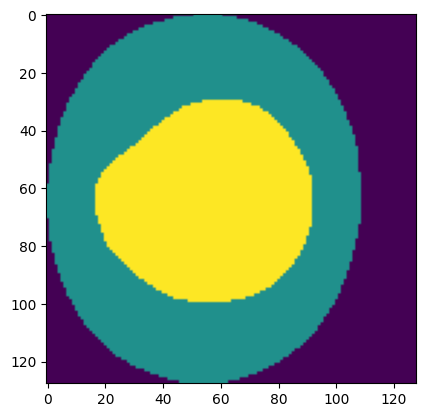

In [ ]:
test_preds = model.predict(x_test)
preds_test_thresh = (np.argmax(test_preds,axis=-1)).astype(np.uint8)
test_img = preds_test_thresh[0, :, :]
plt.imshow(test_img)

In [ ]:
for i in range(0,25):
    plt.figure(figsize=(10,10))
    plt.axis('Off')
    test_image = x_test[i, :, :]
    plt.subplot(1,3,1)
    plt.imshow(test_image)
    plt.title('Input Image', fontsize=14)
    plt.axis('off')

    test_mask=y_test[i,:,:]
    plt.subplot(1,3,2)
    plt.imshow(test_mask)
    plt.title('Ground Truth Mask')
    plt.axis('off')

    test_mask = preds_test_thresh[i, :, :]
    plt.subplot(1,3,3)
    plt.imshow(test_mask, cmap='gray')
    plt.title('Pred Mask', fontsize=14)
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model.save("/content/drive/MyDrive/fyp segmentation/glaucomasegmentationNew.keras")
model.save("/content/drive/MyDrive/fyp segmentation/glaucomasegmentationNew.h5")

In [14]:
# prompt: get 5 existing images from /content/drive/MyDrive/fyp segmentation/dataset/G1020/Images folder and store their filenames in an array. should end with jpg

import os
import glob

image_dir = "/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped"
image_origa_dir = "/content/drive/MyDrive/fyp segmentation/dataset/ORIGA/Images_Cropped"
image_files = glob.glob(os.path.join(image_dir, "*.jpg"))
image_origa_files = glob.glob(os.path.join(image_origa_dir, "*.jpg"))

image_filenames = []
image_origa_filenames = []
for filename in image_files[:10]:  # Get the first 5 files
    image_filenames.append(filename)

for filename in image_origa_files[:10]:
    image_origa_filenames.append(filename)

image_filenames

['/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2474.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_249.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_248.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2457.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2473.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2482.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2503.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_250.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2436.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Cropped/image_2455.jpg']

In [29]:
# prompt: get 5 existing images from /content/drive/MyDrive/fyp segmentation/dataset/G1020/Images folder and store their filenames in an array. should end with jpg

import os
import glob

image_dir = "/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square"
image_origa_dir = "/content/drive/MyDrive/fyp segmentation/dataset/ORIGA/Images_Square"
image_files = glob.glob(os.path.join(image_dir, "*.jpg"))
image_origa_files = glob.glob(os.path.join(image_origa_dir, "*.jpg"))

image_filenames = []
image_origa_filenames = []
for filename in image_files[:10]:  # Get the first 5 files
    image_filenames.append(filename)

for filename in image_origa_files[:10]:
    image_origa_filenames.append(filename)

image_filenames

['/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1081.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1087.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1092.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1095.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1096.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1136.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1112.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_1094.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_110.jpg',
 '/content/drive/MyDrive/fyp segmentation/dataset/G1020/Images_Square/image_111.jpg']

In [30]:
import numpy as np
import cv2  # For image processing
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K

# Define the 'FixedDropout' custom layer
class FixedDropout(layers.Dropout):
    def _get_noise_shape(self, inputs):
        if self.noise_shape is None:
            return self.noise_shape
        symbolic_shape = K.shape(inputs)
        noise_shape = [
            symbolic_shape[axis] if shape is None else shape
            for axis, shape in enumerate(self.noise_shape)
        ]
        return tuple(noise_shape)

# Define the 'swish' activation function
def swish(x):
    return x * keras.activations.sigmoid(x)

# Load the trained model
model = keras.models.load_model(
    "/content/drive/MyDrive/fyp segmentation/glaucomasegmentation.h5",
    compile=False,
    custom_objects={'swish': swish, 'FixedDropout': FixedDropout}
)


model2 = keras.models.load_model(
    "/content/drive/MyDrive/fyp segmentation/glaucomasegmentation.h5",
    compile=False,
    custom_objects={'swish': swish, 'FixedDropout': FixedDropout}
)
# Function to preprocess an image for the model
def preprocess_image(image_path, target_size=(128, 128)): # Change target_size to (128, 128)
    image = cv2.imread(image_path)  # Read the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize to the model's input size
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image




1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


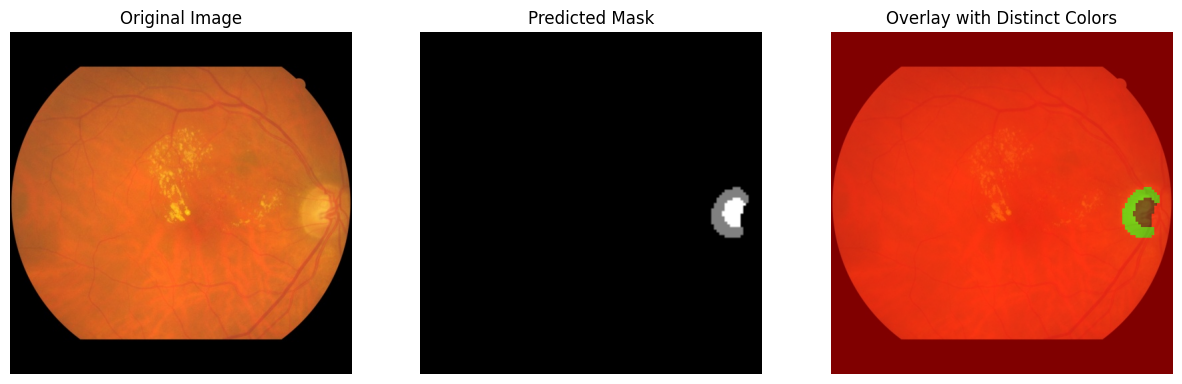

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


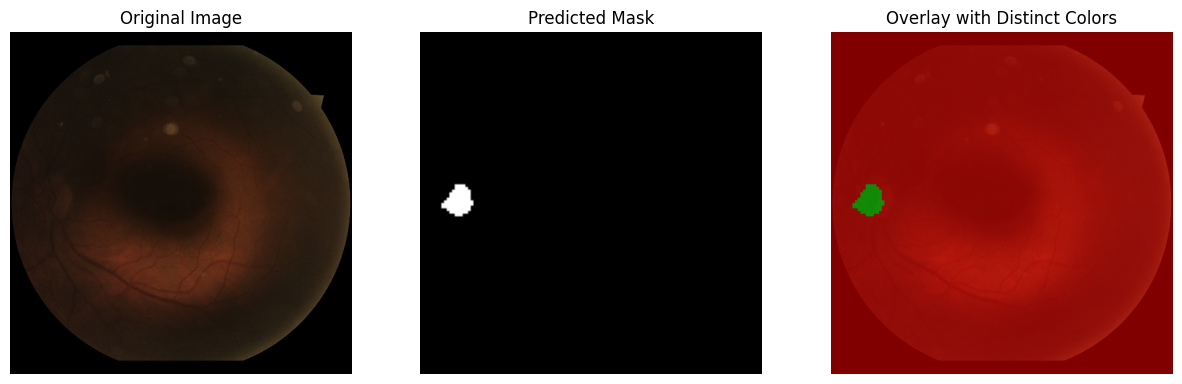

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


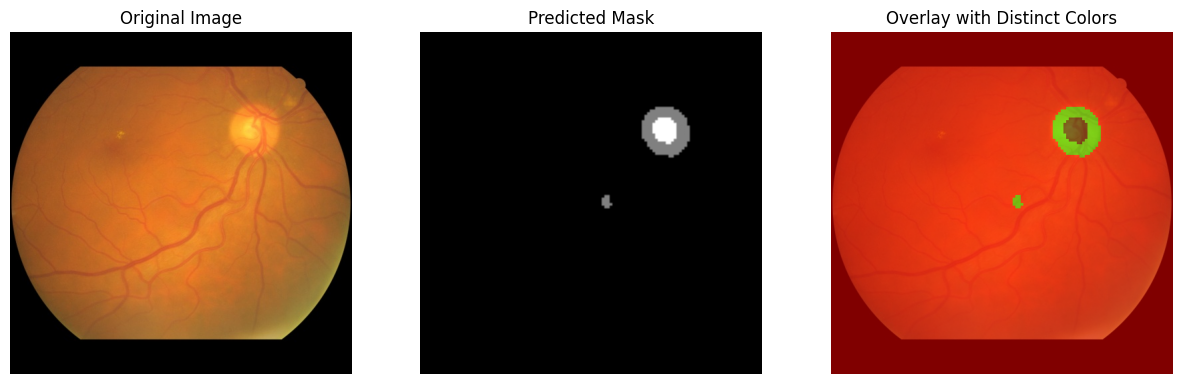

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


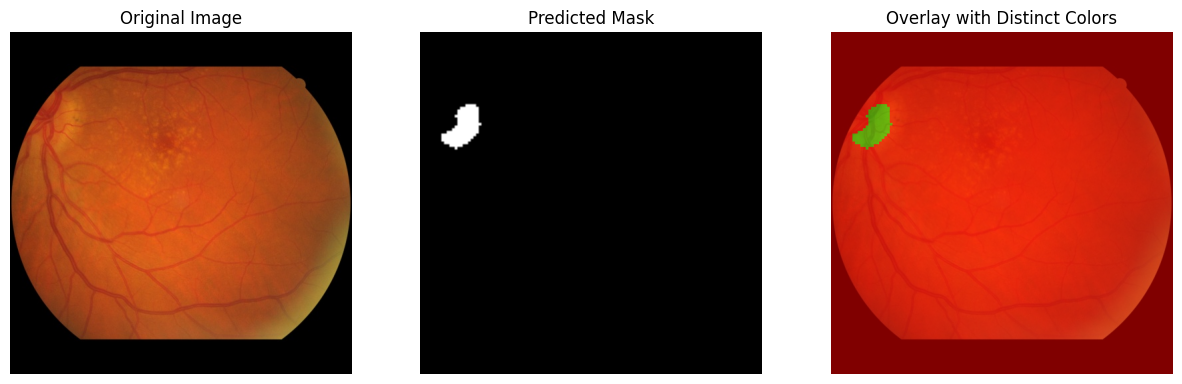

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


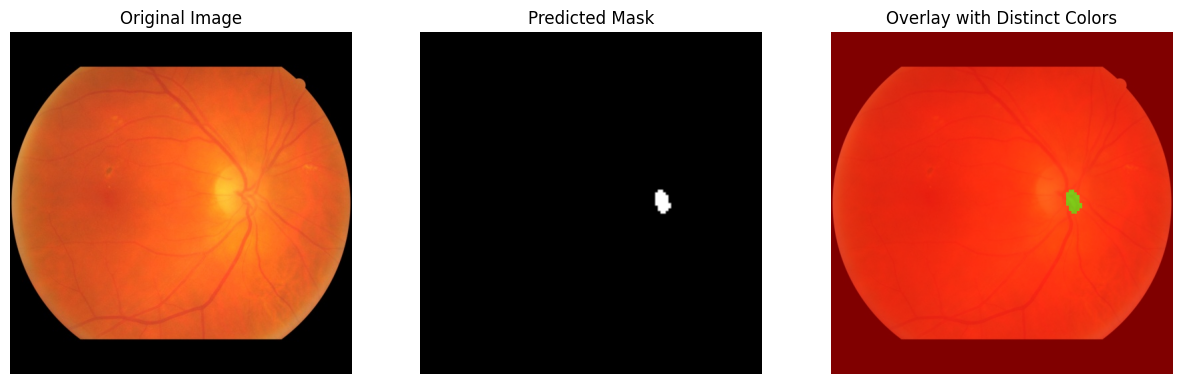

In [31]:
def overlay_mask_on_image_with_colors(image_path, predicted_mask, alpha=0.5):
    """
    Overlays a distinct-colored predicted mask on the original image with transparency.

    Args:
        image_path (str): Path to the original image.
        predicted_mask (numpy array): Predicted mask from the model.
        alpha (float): Transparency factor (0.0: fully transparent, 1.0: fully opaque).

    Returns:
        overlay_image (numpy array): Image with the mask overlay.
    """
    # Read and process the original image
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    # Ensure the mask is the same size as the original image
    mask_resized = cv2.resize(predicted_mask, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Create a blank color mask
    color_mask = np.zeros_like(original_image, dtype=np.uint8)

    # Assign distinct colors to each unique value in the mask
    unique_values = np.unique(mask_resized)
    colors = [(255, 0, 0), (0, 255, 0)]  # Example: Red for 1, Green for 2
    for value, color in zip(unique_values, colors):
        color_mask[mask_resized == value] = color

    # Blend the original image and the colored mask
    overlay_image = cv2.addWeighted(original_image, 1 - alpha, color_mask, alpha, 0)

    return overlay_image


def predict_and_visualize_with_colored_overlay(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Predict using the model
    predictions = model.predict(preprocessed_image)

    # Extract the predicted mask
    predicted_mask = np.argmax(predictions[0], axis=-1)

    # Generate the overlay image with distinct colors
    overlay_image = overlay_mask_on_image_with_colors(image_path, predicted_mask)

    # Display results
    plt.figure(figsize=(15, 5))

    # Original image
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image)
    plt.axis("off")

    # Predicted mask
    plt.subplot(1, 3, 2)
    plt.title("Predicted Mask")
    plt.imshow(predicted_mask, cmap="gray")
    plt.axis("off")

    # Overlay
    plt.subplot(1, 3, 3)
    plt.title("Overlay with Distinct Colors")
    plt.imshow(overlay_image)
    plt.axis("off")

    plt.show()



# Example usage
for i in range(5):
    predict_and_visualize_with_colored_overlay(image_filenames[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Cup-to-Disk Ratio: 0.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


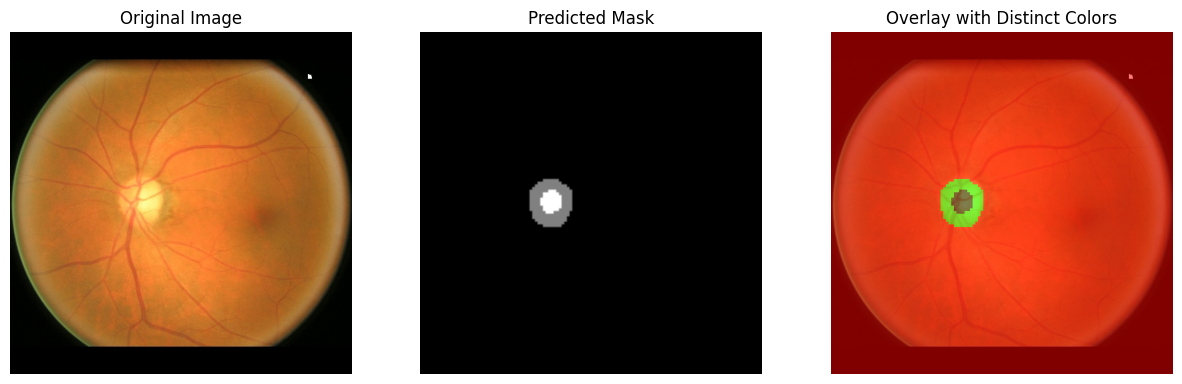

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Cup-to-Disk Ratio: 0.15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


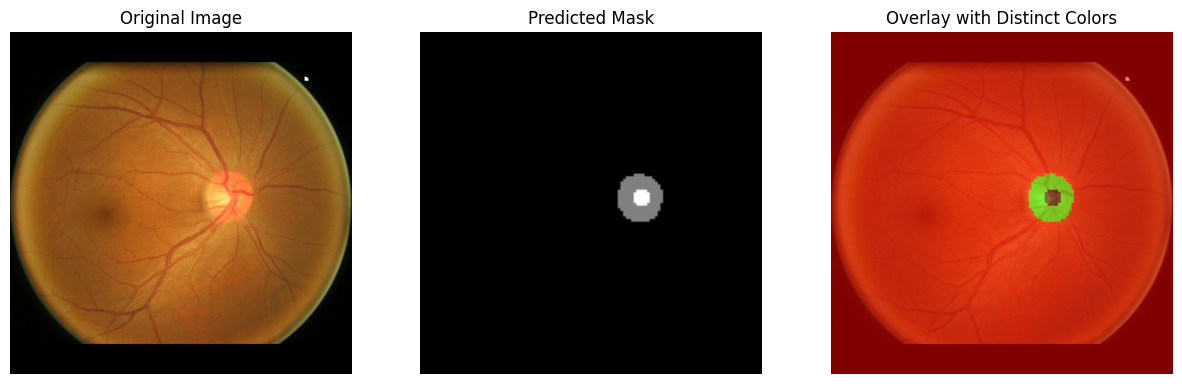

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Cup-to-Disk Ratio: 0.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


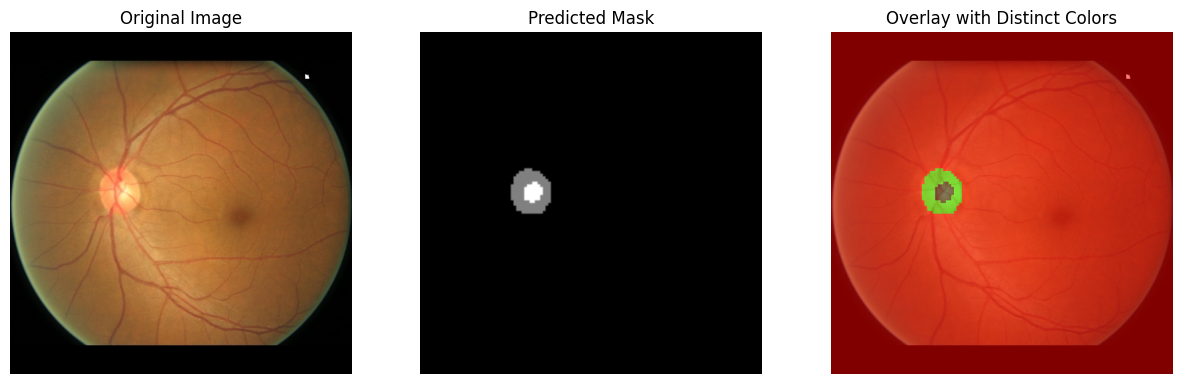

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Cup-to-Disk Ratio: 0.66
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


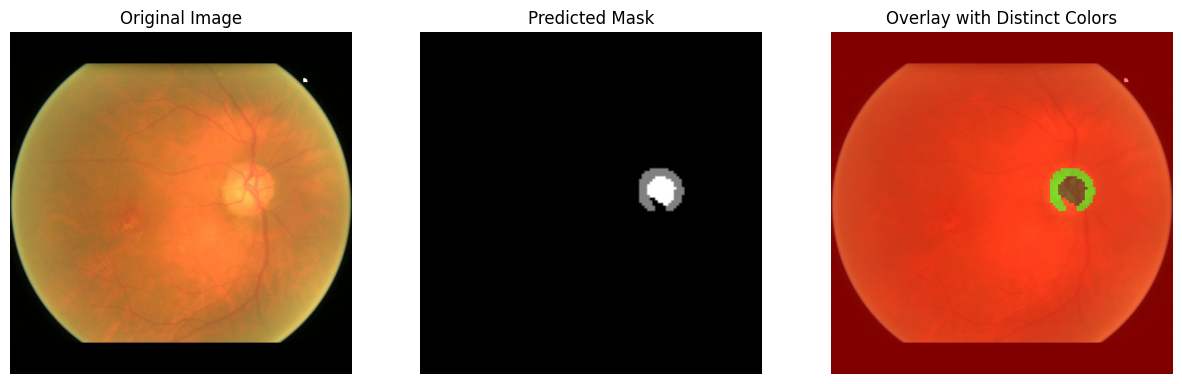

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Cup-to-Disk Ratio: 0.31
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


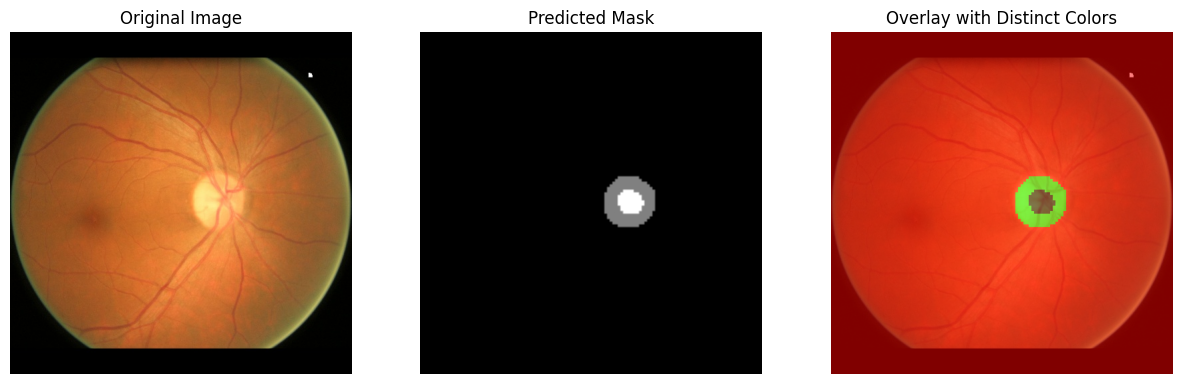

In [32]:
def calculate_cup_to_disk_ratio(predicted_mask):
    """
    Calculates the cup-to-disk ratio from the predicted mask.

    Args:
        predicted_mask (numpy array): Predicted segmentation mask.

    Returns:
        ratio (float): The ratio of the cup area to the disk area.
    """
    # Class IDs (adjust based on your segmentation task)
    disk_class_id = 1  # Optical disk
    cup_class_id = 2   # Optical cup

    # Calculate areas
    disk_area = np.sum(predicted_mask == disk_class_id)
    cup_area = np.sum(predicted_mask == cup_class_id)

    # Handle division by zero (e.g., if disk area is 0)
    if disk_area == 0:
        return None  # Disk area is 0; ratio can't be computed

    # Compute ratio
    ratio = cup_area / disk_area
    return ratio

def predict_and_calculate_ratio(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Predict using the model
    predictions = model.predict(preprocessed_image)

    # Extract the predicted mask
    predicted_mask = np.argmax(predictions[0], axis=-1)

    # Calculate the cup-to-disk ratio
    ratio = calculate_cup_to_disk_ratio(predicted_mask)

    print(f"Cup-to-Disk Ratio: {ratio:.2f}" if ratio is not None else "Disk not detected.")

    return predicted_mask, ratio

# for i in range(5,10):
#     predicted_mask, ratio = predict_and_calculate_ratio(image_filenames[i])
#     predict_and_visualize_with_colored_overlay(image_filenames[i])


for i in range(5,10):
    predicted_mask, ratio = predict_and_calculate_ratio(image_origa_filenames[i])
    predict_and_visualize_with_colored_overlay(image_origa_filenames[i])

In [33]:
img = preprocess_image(image_filenames[0])

test = model.predict(img)
test[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[[9.9999994e-01, 2.2998846e-15, 1.2031001e-16],
        [9.9999994e-01, 5.7069656e-23, 4.8665840e-25],
        [9.9999994e-01, 1.0604138e-21, 3.6580301e-22],
        ...,
        [9.9999994e-01, 2.1439740e-22, 3.7862866e-24],
        [9.9999994e-01, 7.0463555e-23, 7.6030340e-26],
        [9.9999994e-01, 4.4666476e-17, 3.6178603e-19]],

       [[9.9999994e-01, 1.4871127e-20, 6.0581595e-24],
        [9.9999994e-01, 2.6188056e-31, 4.4864642e-36],
        [9.9999994e-01, 5.9757645e-30, 2.7724631e-32],
        ...,
        [9.9999994e-01, 5.5436433e-34, 1.4602295e-37],
        [9.9999994e-01, 1.7335852e-34, 0.0000000e+00],
        [9.9999994e-01, 5.0504545e-26, 2.7992582e-29]],

       [[9.9999994e-01, 8.5530194e-18, 2.9906841e-20],
        [9.9999994e-01, 2.1832209e-27, 6.8677030e-31],
        [9.9999994e-01, 4.9523353e-26, 3.0882572e-27],
        ...,
        [9.9999994e-01, 5.7961224e-33, 1.9025023e-36],
        [9.9999994e-01, 9.8557752e-33, 2.7633320e-38],
        [9.9999994e-01

In [34]:
def calculate_vertical_diameter(mask, class_id):
    """
    Calculates the vertical diameter of a region in the segmentation mask.

    Args:
        mask (numpy array): Segmentation mask.
        class_id (int): Class ID for the region of interest (disk or cup).

    Returns:
        vertical_diameter (float): The vertical diameter of the region.
    """
    # Create a binary mask for the given class
    binary_mask = (mask == class_id).astype(np.uint8)

    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return 0  # No contour found, return 0

    # Find the largest contour (in case of multiple regions)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the contour
    _, y_min, _, y_max = cv2.boundingRect(largest_contour)

    # Compute the vertical diameter
    vertical_diameter = y_max - y_min
    return vertical_diameter

def calculate_vertical_cdr(predicted_mask):
    """
    Calculates the cup-to-disk ratio (CDR) using vertical diameters.

    Args:
        predicted_mask (numpy array): Predicted segmentation mask.

    Returns:
        cdr (float): The vertical CDR (cup vertical diameter / disk vertical diameter).
    """
    # Class IDs (adjust based on your segmentation task)
    disk_class_id = 2  # Optical disk
    cup_class_id = 1   # Optical cup

    # Calculate vertical diameters
    disk_diameter = calculate_vertical_diameter(predicted_mask, disk_class_id)
    cup_diameter = calculate_vertical_diameter(predicted_mask, cup_class_id)

    if disk_diameter == 0:
        return None  # Disk not detected

    # Compute CDR
    print("Cup diameter: " + str(cup_diameter))
    print("Disk diameter: " + str(disk_diameter))
    cdr = disk_diameter / cup_diameter
    return cdr


In [35]:
def predict_and_calculate_cdr(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Predict using the model
    predictions = model.predict(preprocessed_image)

    # Extract the predicted mask
    predicted_mask = np.argmax(predictions[0], axis=-1)

    # Calculate vertical CDR
    cdr = calculate_vertical_cdr(predicted_mask)

    print(f"Vertical CDR: {cdr:.2f}" if cdr is not None else "Disk not detected.")

    return predicted_mask, cdr
# for i in range(5, 10):
#     print("Iteration : ", i)
#     predicted_mask, cdr = predict_and_calculate_cdr(image_filenames[i])
#     predict_and_visualize_with_colored_overlay(image_filenames[i])
#     print("------------------------------------------------------------------------------------------------------------------------------")

for i in range( 10):
    print("Iteration : ", i)
    predicted_mask, cdr = predict_and_calculate_cdr(image_origa_filenames[i])
    predict_and_visualize_with_colored_overlay(image_origa_filenames[i])
    print("------------------------------------------------------------------------------------------------------------------------------")

Output hidden; open in https://colab.research.google.com to view.